In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
df.info

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfP

In [6]:
df.shape

(10000, 14)

In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1, inplace=True)

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

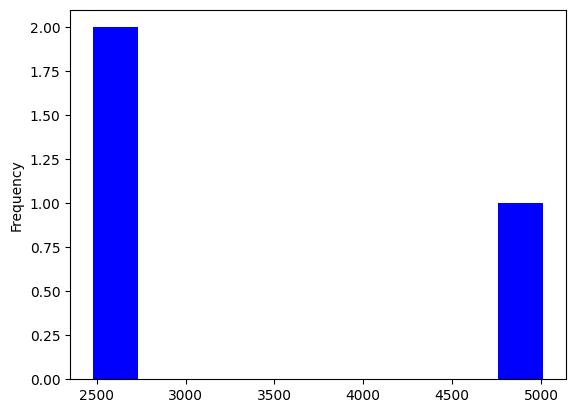

In [9]:
#Data visualization
df.Geography.value_counts().plot(kind='hist',color="blue")
df.Geography.value_counts()

In [10]:
df.Age.describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

<AxesSubplot: >

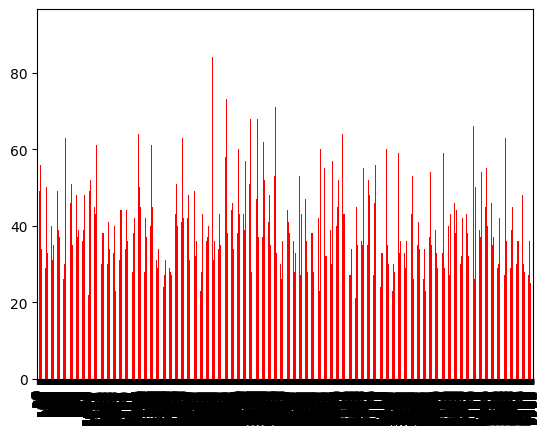

In [11]:
df.Age.plot(kind='bar',color="red")

1    5151
0    4849
Name: IsActiveMember, dtype: int64

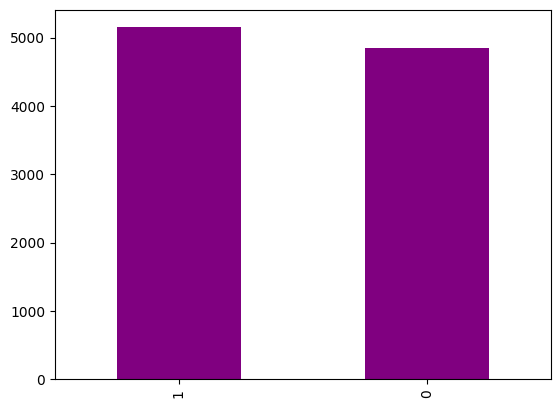

In [12]:
df.IsActiveMember.value_counts().plot(kind='bar',color="purple")
df.IsActiveMember.value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

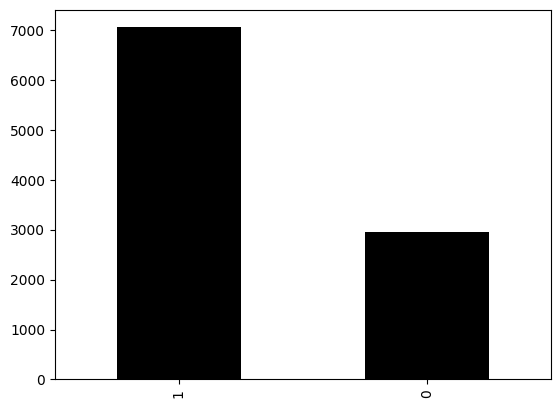

In [13]:
df.HasCrCard.value_counts().plot(kind='bar',color="black")
df.HasCrCard.value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

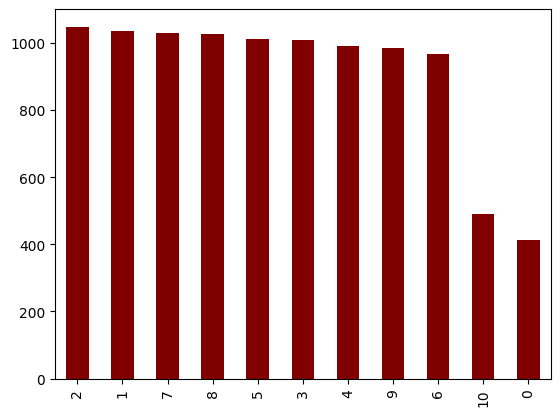

In [14]:
df.Tenure.value_counts().plot(kind='bar',color="maroon");
df.Tenure.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

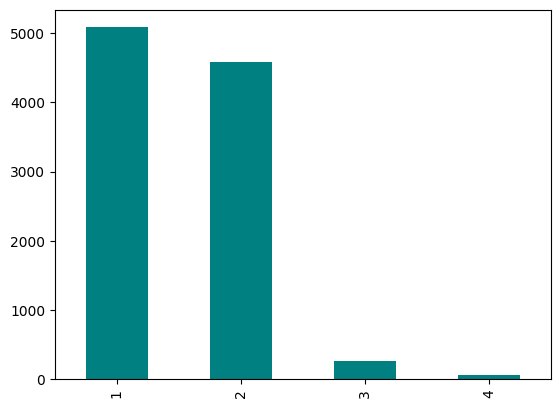

In [15]:
df.NumOfProducts.value_counts().plot(kind='bar',color="Teal");
df.NumOfProducts.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

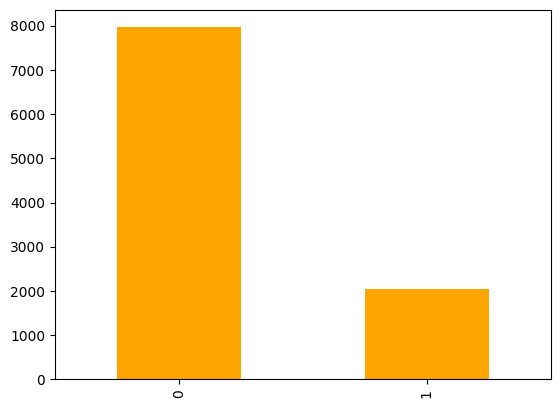

In [16]:
df.Exited.value_counts().plot(kind='bar',color="orange");
df.Exited.value_counts()

<AxesSubplot: xlabel='Exited', ylabel='count'>

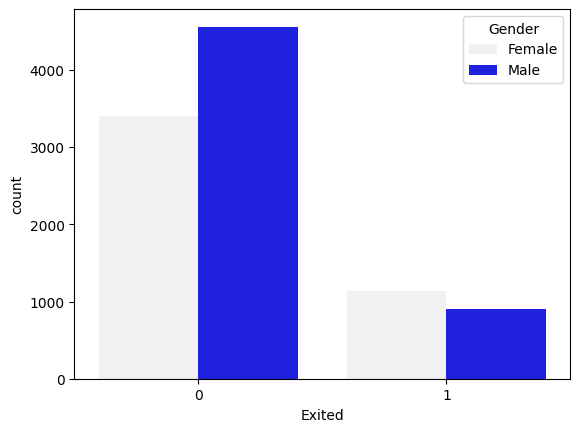

In [17]:
sns.countplot(x=df.Exited,hue=df.Gender,color="Blue")

<AxesSubplot: xlabel='Exited', ylabel='count'>

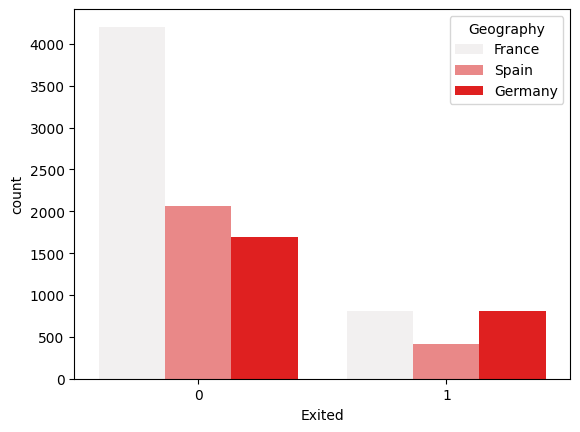

In [18]:
sns.countplot(x=df.Exited,hue=df.Geography,color="red")

<AxesSubplot: xlabel='Exited', ylabel='count'>

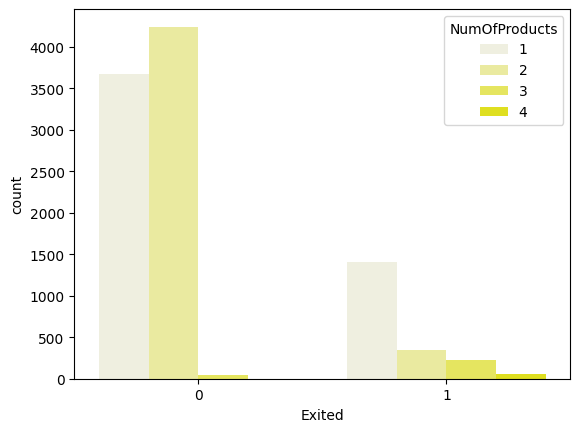

In [19]:
sns.countplot(x=df.Exited,hue=df.NumOfProducts,color="yellow")

<AxesSubplot: xlabel='Exited', ylabel='count'>

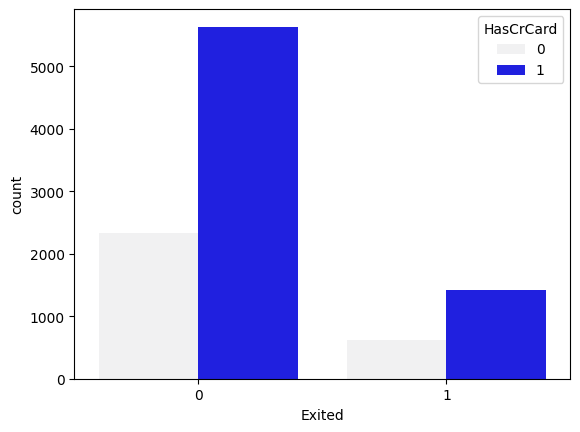

In [20]:
sns.countplot(x=df.Exited,hue=df.HasCrCard,color="blue")

<AxesSubplot: xlabel='Exited', ylabel='count'>

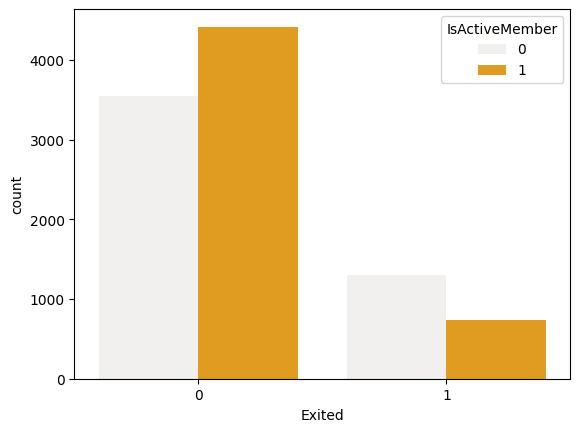

In [21]:
sns.countplot(x=df.Exited,hue=df.IsActiveMember,color="Orange")

<AxesSubplot: xlabel='Exited', ylabel='Balance'>

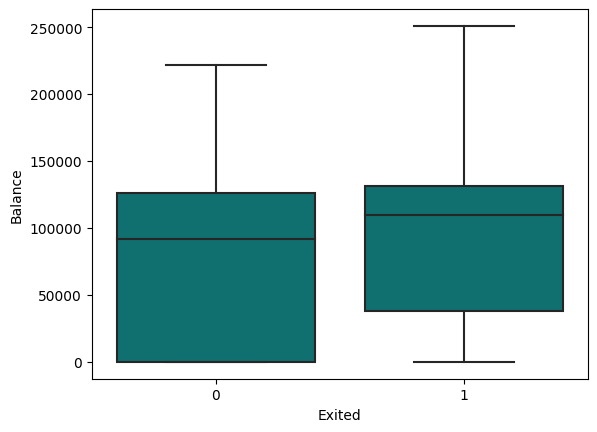

In [22]:
sns.boxplot(x=df.Exited,y=df.Balance,color="teal")

<AxesSubplot: xlabel='Gender', ylabel='count'>

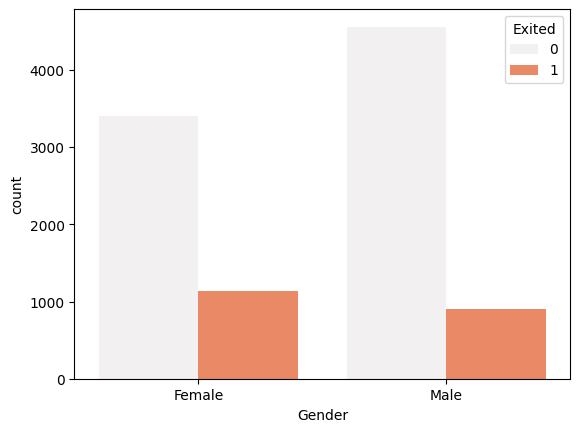

In [23]:
sns.countplot(x="Gender",hue="Exited",data=df,color="coral")

In [24]:
df['Geography']=df['Geography'].map({'France':0,'Spain':1,'Germany':2})

In [25]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [26]:
X.shape

(10000, 10)

In [27]:
#Feature Scaling
le=LabelEncoder()
X[:,2]=le.fit_transform(X[:,2])

In [28]:
print(X)

[[619 0 0 ... 1 1 101348.88]
 [608 1 0 ... 0 1 112542.58]
 [502 0 0 ... 1 0 113931.57]
 ...
 [709 0 0 ... 0 1 42085.58]
 [772 2 1 ... 1 0 92888.52]
 [792 0 0 ... 1 0 38190.78]]


In [29]:
MnScaler = MinMaxScaler()

In [30]:
X = MnScaler.fit_transform(X)

In [31]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2, random_state=0)

In [32]:
stdscaler = StandardScaler()
X_train = stdscaler.fit_transform(X_train)
X_test = stdscaler.transform(X_test)

In [33]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(8000, 10)
(8000,)
(2000, 10)
(2000,)


(None, None)